# Introdução #

O grafeno é um nanoaterial advindo de processos de esfocilação química, mecânica ou evaporação realizados no grafite. Ao submeter o grafite a estas técnicas, em dado momento se obtém o grafeno: material bidimensional formado por ligações hexagonais de carbono.

Este material de uma única camada é o cristal mais fino conhecido, além de ser mais leve que o ar,  melhor condutor de eletricidade que  ouro, mais resistente que o aço, impermeável, maleável e outras tantas qualidades que o faz ser desejado.

A aplicabilidade do grafeno é possível em diferentes áreas, sendo as mais conhecidas: energia, compósitos, telecomunicações, eletrônica, construção civil e automobilísca, além de aplicações medicinais. Desde de a sua descoberta em 2016, por dois cientistas russos, o grafeno vem sendo objeto de estudo com o afim de desenvolver novas aplicações com o material e desenvolver formas mais barata de produzi-lo em grande escala. 

# Objetivo #

Nos processos de produção de grafeno, a caracterização de um óxidos de grafeno é uma parte importante para determinar a qualidade do material obtido e determinar suas caracteríticas para aplicação específicas.  

A caracterização consiste em determinar a quantidade de carbono contida no grafite utilizado como matéria prima, os percentuais de hidrogênio, oxigênio e outros elemestos contidos na solução, além de determinar o tamanho dos flakes de grafeno e a quantidade de camadas dos flakes.

Como os processos de mensuração dos flakes é feito manualmente e exige certo custo, além de inviabilizar que o material seja escalável, deseja-se neste trabalho desenvolver um algoritmo capaz de identificar os flakes de grafeno por meio de técnicas de visão computacional. Para isso serão implementados técnicas de tratamento de imgens, utilização de máscaras, detecção das bordas e mensuração dos flakes encontrados.

# Metodologia implementada #
Importar bibliotecas:
* OpenCV : Biblioteca de visão computacional, para manipulação de imagens, utilização de filtros e treinamento de redes neurais com aplicação de imagens. 
* Numpy : Utilizada para a realização de alguns cálculos, plots e analises.
* Matplotlib : Plotar gráficos e alterar parâmetros em tempo real.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
%matplotlib notebook

Importando amostras de Óxido de Grafeno a serem analisadas na prova de conceito.

Amostra de Óxido de Grafeno (GO) coletada no MACKGRAPHE


<IPython.core.display.Javascript object>


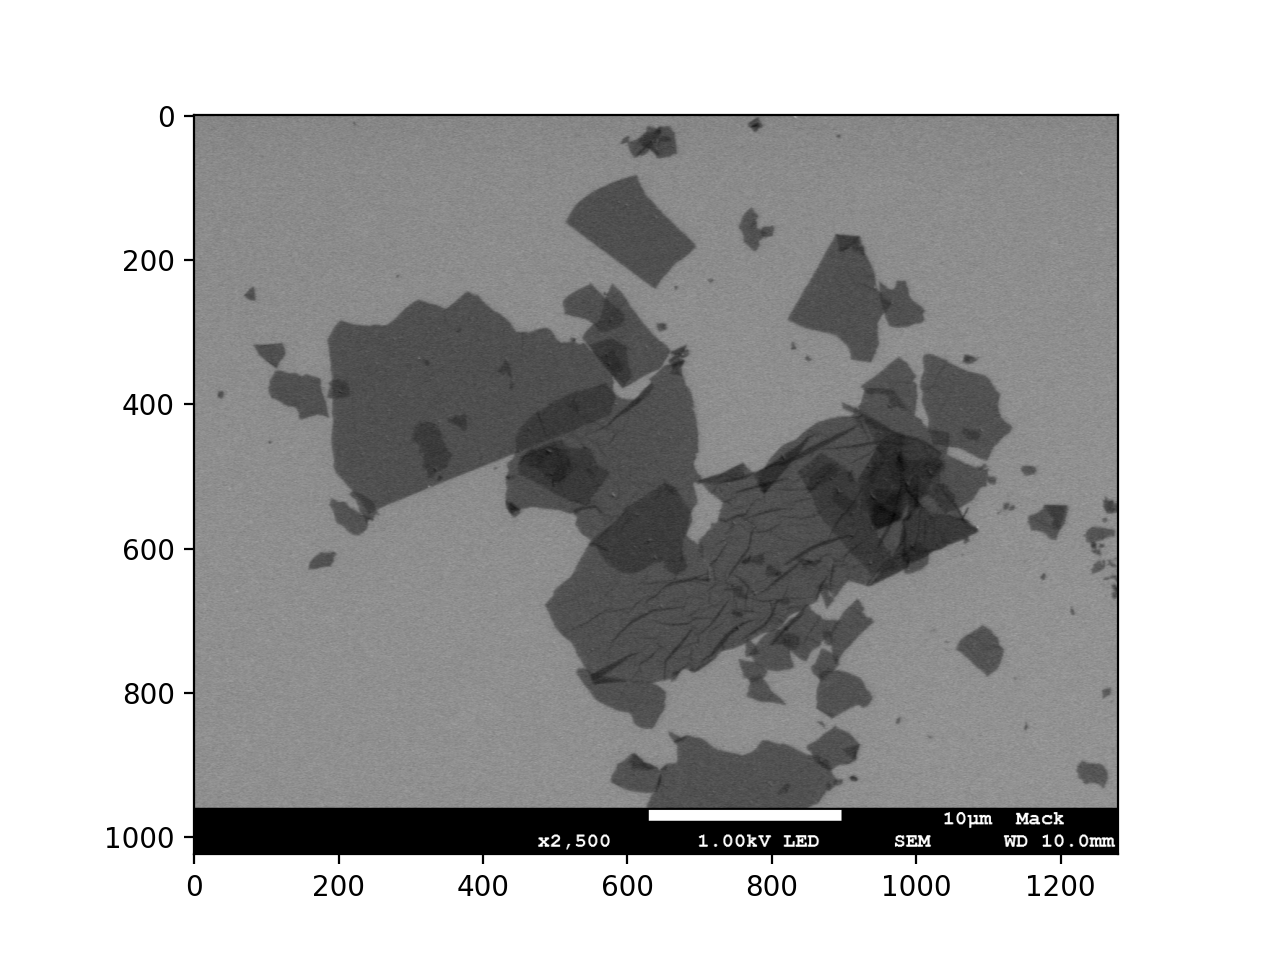

Dimensões da imagem: (1024, 1280, 3)


In [3]:
img1 = cv2.imread("graphene.png")
img2 = cv2.imread("graphenelab1.bmp")
img3 = cv2.imread("graphenelab2.bmp")
img4 = cv2.imread("graphenelab3.bmp")


img = img2
print("Amostra de Óxido de Grafeno (GO) coletada no MACKGRAPHE")
plt.imshow(img)
print("Dimensões da imagem:",img.shape)

Dadas as dimensões da imagem 1024 x 1280, sabendo que não desejo os meta dados na parte inferior da imagem, cortaremos a imagem com dimensões de 1028 X 950 p.

<IPython.core.display.Javascript object>


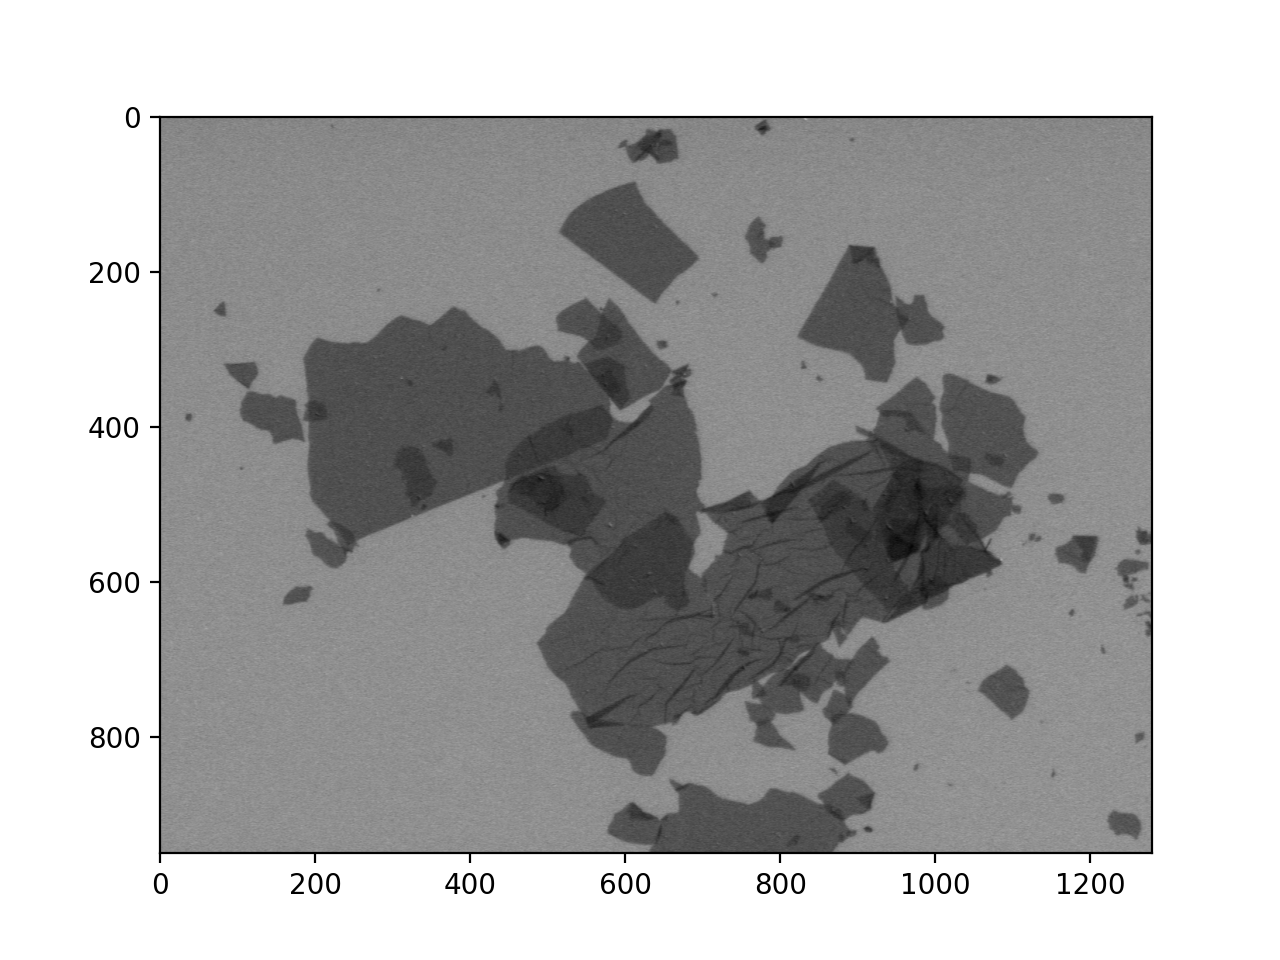

In [4]:
img = img[0:950, 0:1280]
plt.imshow(img)

Como a imagem está com 3 canais na sua composição, sabemos que esta é composta por três cores red, green e blue (RGB). Neste trabalho não vimos a necessidade de usar os 3 padrões de cores, por isso transformaremos a imagem para a escla monocromática de ciza.

Amostra de Óxido de Grafeno (GO) na escala de cinza


<IPython.core.display.Javascript object>


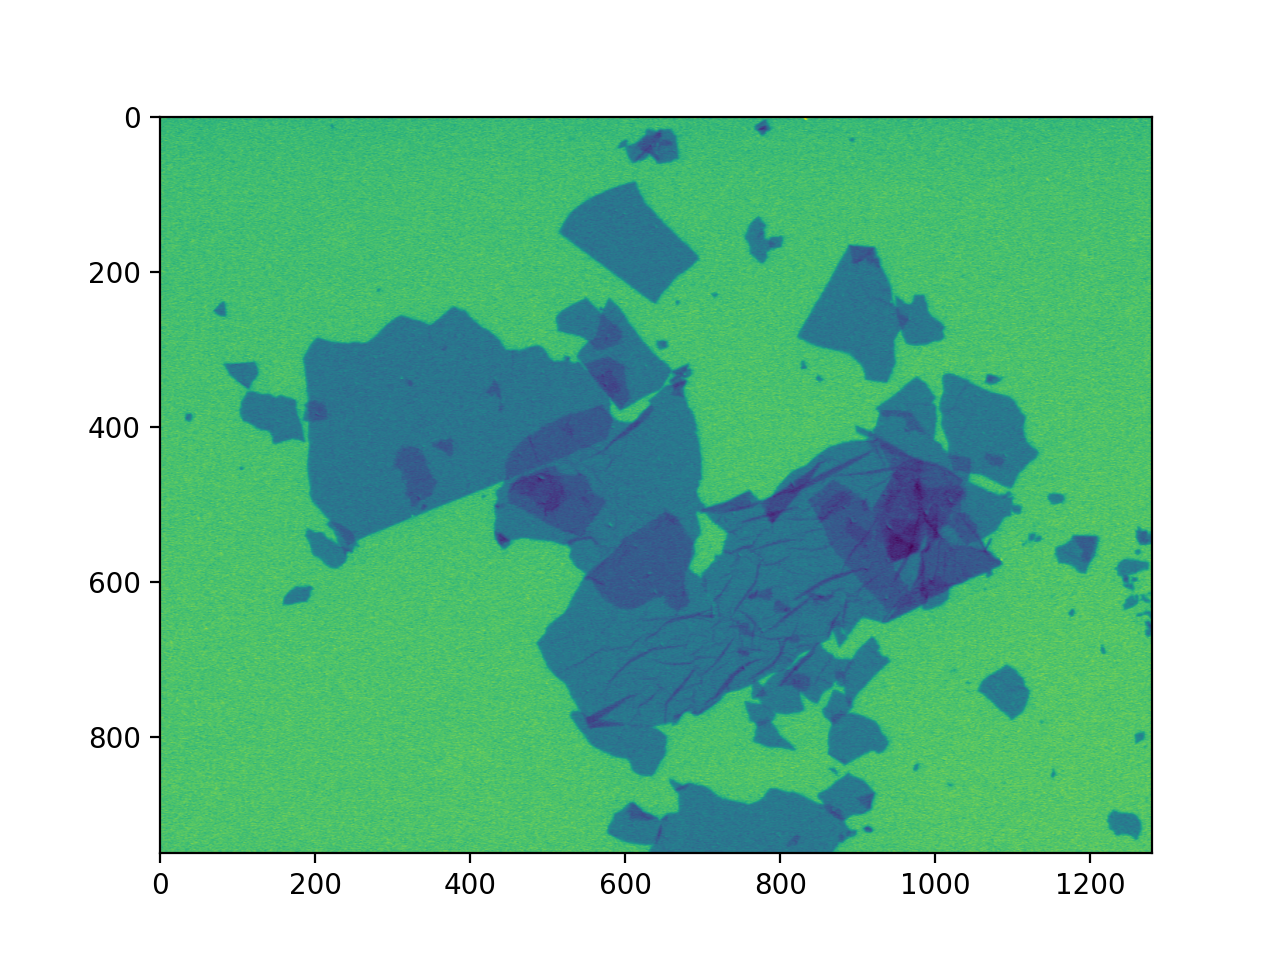

(950, 1280)


In [5]:
image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print("Amostra de Óxido de Grafeno (GO) na escala de cinza")
plt.imshow(image)
print(image.shape)

Determinando melhores parâmetros para a criação de mascaras:

In [ ]:
def empty(a):
    pass
 
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver
 
 
# path = 'graphene.png'
cv2.namedWindow("TrackBars")
cv2.resizeWindow("TrackBars",240,120)
cv2.createTrackbar("Hue Min","TrackBars",0,179,empty)
cv2.createTrackbar("Hue Max","TrackBars",19,179,empty)
cv2.createTrackbar("Sat Min","TrackBars",110,255,empty)
cv2.createTrackbar("Sat Max","TrackBars",240,255,empty)
cv2.createTrackbar("Val Min","TrackBars",153,255,empty)
cv2.createTrackbar("Val Max","TrackBars",255,255,empty)
 
while True:
#     img2 = cv2.imread(path)
#     img = img2[0:100,0:100]
    imgHSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    h_min = cv2.getTrackbarPos("Hue Min","TrackBars")
    h_max = cv2.getTrackbarPos("Hue Max", "TrackBars")
    s_min = cv2.getTrackbarPos("Sat Min", "TrackBars")
    s_max = cv2.getTrackbarPos("Sat Max", "TrackBars")
    v_min = cv2.getTrackbarPos("Val Min", "TrackBars")
    v_max = cv2.getTrackbarPos("Val Max", "TrackBars")
    print(h_min,h_max,s_min,s_max,v_min,v_max)
    lower = np.array([h_min,s_min,v_min])
    upper = np.array([h_max,s_max,v_max])
    mask = cv2.inRange(imgHSV,lower,upper)
    imgResult = cv2.bitwise_and(img,img,mask=mask)
 
 
    cv2.imshow("Original",img)
    cv2.imshow("HSV",imgHSV)
    cv2.imshow("Mask", mask)
    cv2.imshow("Result", imgResult)
 
    imgStack = stackImages(0.6,([img,imgHSV],[mask,imgResult]))
    #cv2.imshow("Stacked Images", imgStack)
    cv2.waitKey(1)

0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255


Função para plotar gráficos em matrizes, podendo plotar mais de uma imagem para compração e entendimento dos processos estabelecidos.

In [6]:
 def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver

Função de terminação de contornos e de cálculo de áreas.

In [7]:
def getContours(img):
    contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
#        print(area)
        if area>500:
            cv2.drawContours(imgContour, cnt, -1, (255, 0, 0), 1)
            peri = cv2.arcLength(cnt,True)
            #print(peri)
            approx = cv2.approxPolyDP(cnt,0.02*peri,True)
            print(len(approx))
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)
 
#            if objCor ==3: objectType ="Tri"
#            elif objCor == 4:
#                aspRatio = w/float(h)
#                if aspRatio >0.98 and aspRatio <1.03: objectType= "Square"
#                else:objectType="Rectangle"
#            elif objCor>4: objectType= "Circles"
#            else:objectType="None"
# 
 
 
#            cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),2)
#            cv2.putText(imgContour,objectType,
#                        (x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.7,
#                        (0,0,0),2)

Alterações morfológicas de fechamento e filtros impostos.

<IPython.core.display.Javascript object>


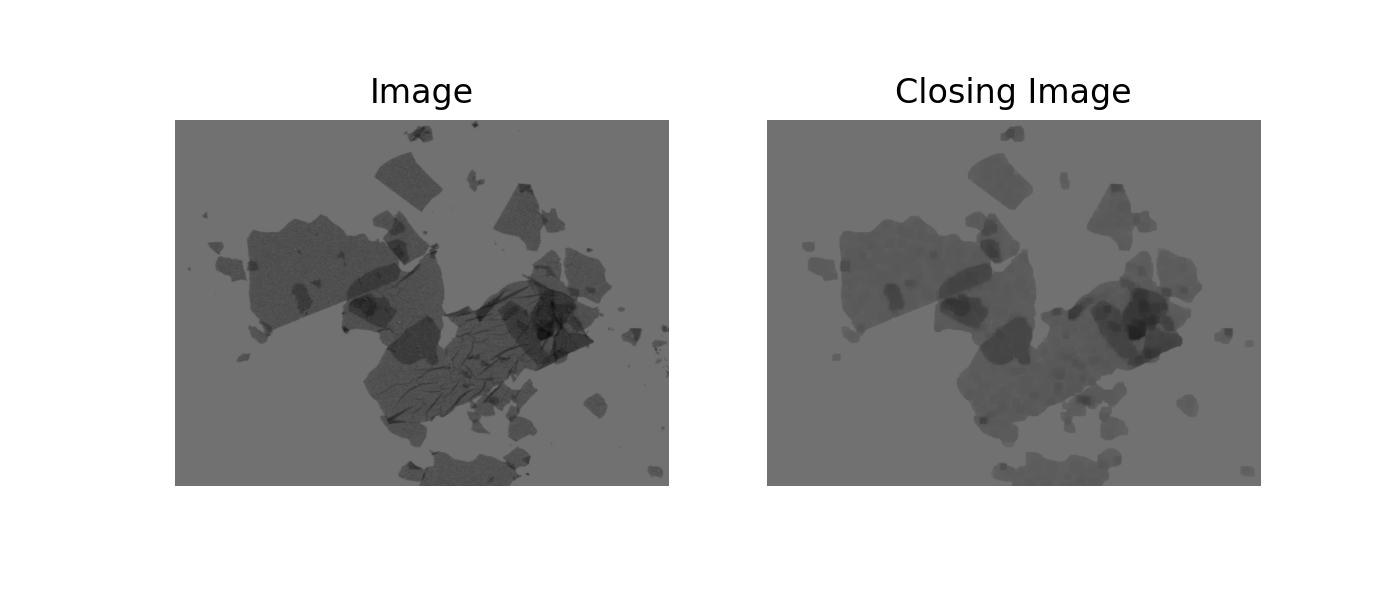

In [37]:
# limiar, img = cv2.threshold(img, 113, 130, cv2.THRESH_TRUNC)
# # limiar, img = cv2.threshold(img2, 95, 250, cv2.THRESH_BINARY)
# imgContour = img.copy()
# getContours(imgCanny)
# plt.imshow(imgContour)

kernel = np.ones((15,15),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
fig, ax = plt.subplots(ncols=2,figsize=(7,3))
ax[0].imshow(img,cmap = 'gray')
ax[0].set_title('Image') 
ax[0].axis('off')
ax[1].imshow(closing,cmap = 'gray')
ax[1].set_title('Closing Image')
ax[1].axis('off')
plt.show()

# Resultados e Discussão

6
9
7
6
11
9
7
5
7


<IPython.core.display.Javascript object>


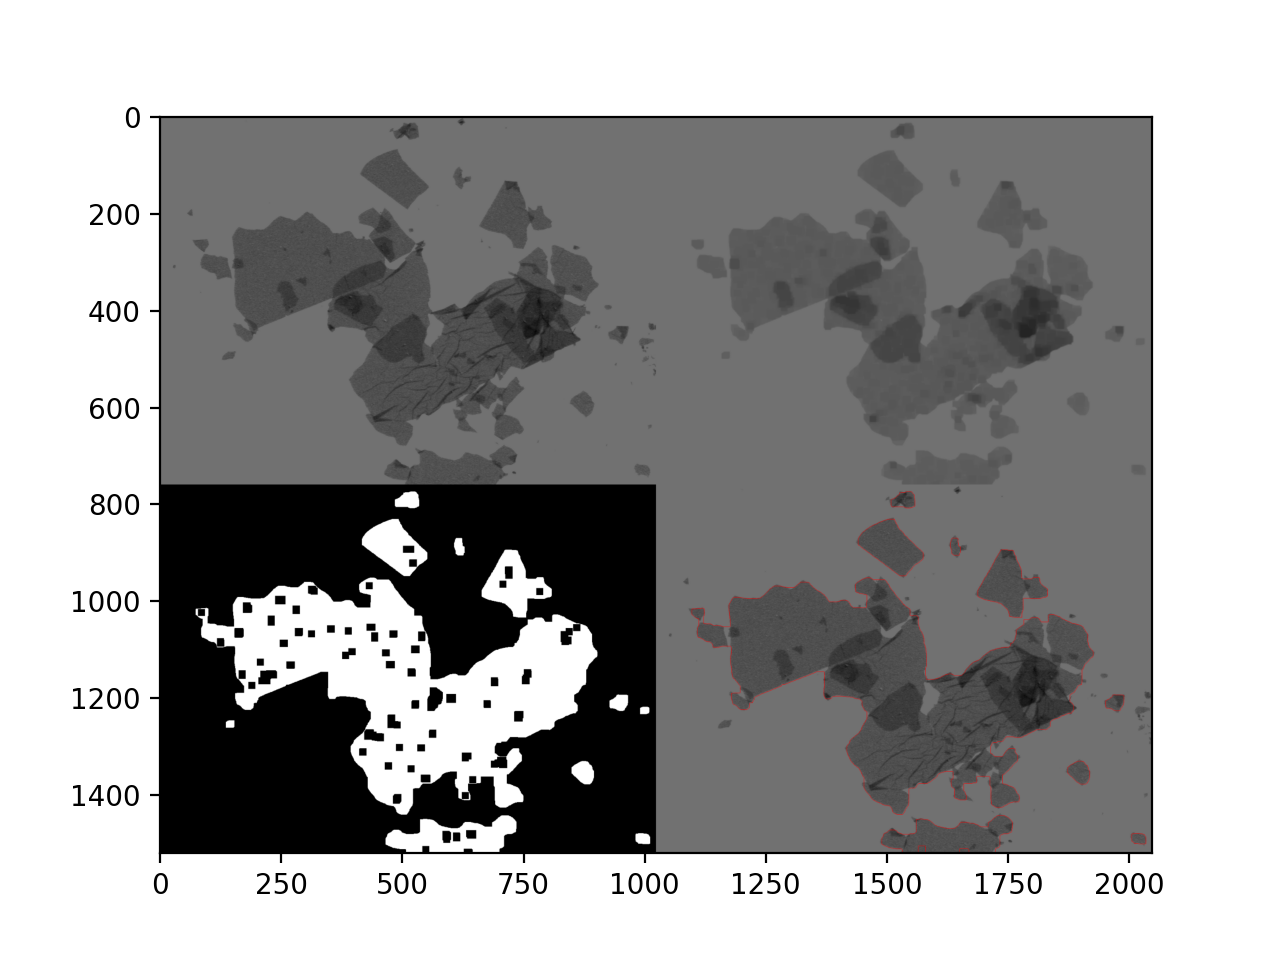

AxesImage(80,52.8;496x369.6)


In [54]:
imgGray = cv2.cvtColor(closing,cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray,(7,7),1)
imgCanny = cv2.Canny(imgBlur,1,1)

kernel2 = np.ones((18,18),np.uint8)
imgCannyCL = cv2.morphologyEx(imgCanny, cv2.MORPH_CLOSE, kernel2)

imgContour = img.copy()
getContours(imgCannyCL)


#imgBlank = np.zeros_like(img)
imgStack = stackImages(0.8,([img,imgBlur],
                            [imgCannyCL,imgContour]))
print(plt.imshow(imgStack))
#print(plt.imshow(imgContour))

É possível obesrvar que, com as máscaras aplicadas, alterações morfológicas de fechamento de imagens por meio de convoluções, que o modelo foi capaz de detectar as bordas dos flakes de grafeno. Como a prova de conceito foi realizada levando em consideração somente um nível de threshold, não houve distinção dos flakes sobrepostos, ocasionando em um erro de contagem.

Com a delimitação das bordas, é possível fazer alguns cálculos de área considerando as dimensões dos pixels. Os resultados não são realísticos, pois não consideram cálculos de conversão que tornem a escala da imagem proporcional ao tamanhos dos pixels. 

Mudanças morfológicas na imagem, como a de fechamento de imagens por meio de convoluções, acabaram prejudicando a fidelidade da imagem com relação a flakes menores. Como o número de pixels que compõe estes flakes é muito pequeno, as convoluções acabaram tornando seus pixels 1 em 0, limpando-os das imagem (Fig. 2).

# Conslusão e próximos passos #

Por meio de técnicas de visão computacional foi possível detectar os flakes contidos nas imagens, demonstrando em uma prova de conceito que é possível obter resultados satisfatorios na detecção das bordas do material. Quando os flakes de grafeno estão sobrepostos, o algoritmo não conseguiu distinguir os diferentes grafenos flakes, considerando o conjunto como um único flake.

Como próximos passos, busca-se distinguir a sobreposição dos flakes, separando-os adequadamente. Deve-se verificar em laboratório a escala das imagens, para que a proporção de pixels contabilizados apresente a medida correta. Além disso, pode-se treinar uma rede neural artificial para determinar o número de camadas de cada flake de grafeno. Outro fator importante é aplicar diferentes intervalos de threshold, bucando sobrepor matrizes na tentativa de distinguir flakes de grafeno sobrepostos. 

# Bibliografia #

Novoselov1 K. S., Fal9ko V. I., Colombo L., Gellert4 P. R., Schwab5  M. G., Kim6 K. Road map for graphene. Nature, Manchester, DOI: 10.1038 v. 490, n. 1, p. 192-200, out. 2012. Disponível em: http://www.condmat.physics.manchester.ac.uk/media/eps/condensedmatterphysicsgroup/publications/GrapeneRoadmap.pdf. Acesso em: 21 nov. 2020.

Rao C. N. R., Biswas Kanishka, Subrahmanyama K. S., Govindarajab A. Graphene, the new nanocarbon. Journal of Materials Chemistry, Manchester, DOI: 10.1039/b815239j v. 19, n. 1, p. 2457–2469, jan. 2009. Disponível em: http://www.condmat.physics.manchester.ac.uk/media/eps/condensedmatterphysicsgroup/publications/GrapeneRoadmap.pdf. Acesso em: 21 nov. 2020.

Chung C., Kim Y.,Shin D., Ryoo S., Hong B. H., Min D. Journal of Materials Chemistry, Seoul, DOI: 10.1021/ar300159f v. 46, n. 10, p. 2211–2224, Mai. 2012. Disponível em: https://d1wqtxts1xzle7.cloudfront.net/45020900/Biomedical_Applications_of_Graphene_and_20160423-672-1j2998f.pdf?1461432464=&response-content-disposition=inline%3B+filename%3DBiomedical_Applications_of_Graphene_and.pdf&Expires=1607368201&Signature=RyaUXmdYF-KaLgRloTljYjsNUXcwsowti8KPLjUACWSAaon0DHtpxfkBTZxcNK22ziVIpkpTxiRP-WvJ3f4KDAqBPDKNCT2~bFyw84Fkwlldt0BmUUolHJVgwCF4m0jrlzVs2GZ179UsuEgI-0IN3CJ-N0lodsCBnpDecoy3D~VQv4nAwiP9jqB9npBOSbDwnNnBA3SFXbC5JOgqDmCfQQbrJfsnAXodYwOcRMXWdI-Fd~muaDm-VGZQeQPWzt2A21Rgh5KPnSZVvT~ospgKNosHr~cTQf~7VcoVpk6TNF8Y0iUyZ2Ndr1UwO2HR-PPX3TTjm7Aci5r5AKyoQtI7ag__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA. Acesso em: 21 nov. 2020.

Luísa Mendes Heise. Detecção de Bordas e Transformações Morfológicas em Imagens com OpenCV. Medium, set. 2020. Disponível em: https://medium.com/turing-talks/detec%C3%A7%C3%A3o-de-bordas-e-transforma%C3%A7%C3%B5es-morfol%C3%B3gicas-em-imagens-com-opencv-8aecf8c8ba2f. Acesso em: 29 nov. 2020.

Rodrigo Fill Rangel. Visão Computacional — O que é convolução? Medium, set. 2020. Disponível em: https://medium.com/turing-talks/vis%C3%A3o-computacional-o-que-%C3%A9-convolu%C3%A7%C3%A3o-ad709f7bd6b0. Acesso em: 29 nov. 2020.

Rodrigo Fill Rangel. Visão Computacional — O que é convolução? Medium, set. 2020. Disponível em: https://docs.opencv.org/master/dd/dd7/tutorial_morph_lines_detection.html. Acesso em: 23 nov. 2020.

Graphenea. Graphenea Graphene Oxide (GO). Datasheet, Boston. Disponível em: https://www.newmetals.co.jp/pdf/702.pdf. Acesso em: 15 set. 2020.

